In [1]:
import os
import numpy as np
import efficientnet.tfkeras
from tensorflow.keras.models import load_model
import tensorflow as tf
import pandas as pd

In [2]:
## set gpu
gpu = 0
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu}" 
physical_devices = tf.config.list_physical_devices('GPU') 
print("Num GPUs:", len(physical_devices))

Num GPUs: 1


In [3]:
# os.environ["CUDA_VISIBLE_DEVICES"] = "" 

# physical_devices = tf.config.list_physical_devices('GPU') 
# print("Num GPUs:", len(physical_devices))

# Load model

In [3]:
fold = 3

In [4]:
model_dir = f'/media/tohn/HDD/rheology2023/EffNetB7Model/Classification/Blood_Viscosity/typeBEvsBM_classes/fold{fold}/R2/models/EffNetB7_typeBEvsBM_Class_fold{fold}_R2.h5' 
#model = load_model(model_dir)
print(f"Load Model: {model_dir}")
model = load_model(model_dir, compile=False)
height = width = model.input_shape[1]
print(height, width)

Load Model: /media/tohn/HDD/rheology2023/EffNetB7Model/Classification/Blood_Viscosity/typeBEvsBM_classes/fold3/R2/models/EffNetB7_typeBEvsBM_Class_fold3_R2.h5
600 600


In [5]:
model.summary()

Model: "EffNetModel_Blood"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 600, 600, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 300, 300, 64) 1728        input_2[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 300, 300, 64) 256         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 300, 300, 64) 0           stem_bn[0][0]                    
__________________________________________________________________________________

block5e_bn (BatchNormalization) (None, 38, 38, 1344) 5376        block5e_dwconv[0][0]             
__________________________________________________________________________________________________
block5e_activation (Activation) (None, 38, 38, 1344) 0           block5e_bn[0][0]                 
__________________________________________________________________________________________________
block5e_se_squeeze (GlobalAvera (None, 1344)         0           block5e_activation[0][0]         
__________________________________________________________________________________________________
block5e_se_reshape (Reshape)    (None, 1, 1, 1344)   0           block5e_se_squeeze[0][0]         
__________________________________________________________________________________________________
block5e_se_reduce (Conv2D)      (None, 1, 1, 56)     75320       block5e_se_reshape[0][0]         
__________________________________________________________________________________________________
block5e_se

__________________________________________________________________________________________________
block6l_project_bn (BatchNormal (None, 19, 19, 384)  1536        block6l_project_conv[0][0]       
__________________________________________________________________________________________________
block6l_drop (FixedDropout)     (None, 19, 19, 384)  0           block6l_project_bn[0][0]         
__________________________________________________________________________________________________
block6l_add (Add)               (None, 19, 19, 384)  0           block6l_drop[0][0]               
                                                                 block6k_add[0][0]                
__________________________________________________________________________________________________
block6m_expand_conv (Conv2D)    (None, 19, 19, 2304) 884736      block6l_add[0][0]                
__________________________________________________________________________________________________
block6m_ex

## Select Data

- fold1-3

In [6]:
df_2dFFT = pd.read_csv("/home/kannika/code/Rheology2023/Rheology_Blood/Dataset_Blood_Viscosity-2dFFTdataset-3channels-3Fold-EMClasses.csv")
train_2dFFT = df_2dFFT[df_2dFFT['fold']!=fold].reset_index(drop=True)
print("Fold Train set", set(train_2dFFT['fold']))
print(train_2dFFT.shape)

test_2dFFT = df_2dFFT[df_2dFFT['fold']==fold].reset_index(drop=True)
print("Fold Test set", set(test_2dFFT['fold']))
print(test_2dFFT.shape)

test_2dFFT.head()

Fold Train set {1, 2}
(112, 16)
Fold Test set {3}
(56, 16)


,Unnamed: 0,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0.1.1,image_name,image_path,image_folder,folder_source,classes,Code,subclass,dt,classes_binary,typeBEvsBM,fold,typeBEvsBM_binary
0,112,112,137,137,HN23_D0_30HZ_20XINF_UWELL_25651227_145726_dt2_...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,HN23_D0_30HZ_20XINF_UWELL_25651227_145726,SSD_Backup,HN,HN23,Splenectomy,"[2, 5, 7]",1,E,3,0
1,113,113,274,274,HN38_D0_30HZ_20XINF_UWELL_25660223_150521_dt2_...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,HN38_D0_30HZ_20XINF_UWELL_25660223_150521,SSD_Backup,HN,HN38,No_Splenectomy,"[2, 5, 7]",1,E,3,0
2,114,114,136,136,HN23_D0_30HZ_20XINF_UWELL_25651227_145513_dt2_...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,HN23_D0_30HZ_20XINF_UWELL_25651227_145513,SSD_Backup,HN,HN23,Splenectomy,"[2, 5, 7]",1,E,3,0
3,115,115,30,30,HN12_D0_30HZ_20XINF_UWELL_25651122_135932_dt2_...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,HN12_D0_30HZ_20XINF_UWELL_25651122_135932,SSD_Backup,HN,HN12,Splenectomy,"[2, 5, 7]",1,E,3,0
4,116,116,266,266,HN38_D0_30HZ_20XINF_UWELL_25660223_144746_dt2_...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,HN38_D0_30HZ_20XINF_UWELL_25660223_144746,SSD_Backup,HN,HN38,No_Splenectomy,"[2, 5, 7]",1,E,3,0


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = (height, width)
BATCH_SIZE = 16

### Get data Loder
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range=20,
                    brightness_range=[0.5, 1.5],
                    shear_range=0.5,
                    horizontal_flip = False,
                    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train_2dFFT,
        directory = None,
        x_col = 'image_path',
        y_col = 'typeBEvsBM',
        target_size = (height, width),
        batch_size=BATCH_SIZE,
        color_mode= 'rgb',
        class_mode='categorical')


#label
labels = (train_generator.class_indices)
labels = dict((v,k.replace("C","")) for k,v in labels.items())
print(labels)

Found 112 validated image filenames belonging to 2 classes.
{0: 'E', 1: 'M'}


## Prediction

In [8]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])
    
    return result[0]

In [9]:
#Predict
pred_list = list()
prob_list = list()
img_path=test_2dFFT['image_path'].tolist()
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(labels[result])
    prob_list.append(predict[result])

In [10]:
predict

array([0.9977621 , 0.00223787], dtype=float32)

In [11]:
print(len(pred_list))
print(len(prob_list))

test_2dFFT['category'] = pred_list
test_2dFFT['Prob'] = prob_list
test_2dFFT.head()

56
56


,Unnamed: 0,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0.1.1,image_name,image_path,image_folder,folder_source,classes,Code,subclass,dt,classes_binary,typeBEvsBM,fold,typeBEvsBM_binary,category,Prob
0,112,112,137,137,HN23_D0_30HZ_20XINF_UWELL_25651227_145726_dt2_...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,HN23_D0_30HZ_20XINF_UWELL_25651227_145726,SSD_Backup,HN,HN23,Splenectomy,"[2, 5, 7]",1,E,3,0,E,0.999939
1,113,113,274,274,HN38_D0_30HZ_20XINF_UWELL_25660223_150521_dt2_...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,HN38_D0_30HZ_20XINF_UWELL_25660223_150521,SSD_Backup,HN,HN38,No_Splenectomy,"[2, 5, 7]",1,E,3,0,E,1.000000
2,114,114,136,136,HN23_D0_30HZ_20XINF_UWELL_25651227_145513_dt2_...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,HN23_D0_30HZ_20XINF_UWELL_25651227_145513,SSD_Backup,HN,HN23,Splenectomy,"[2, 5, 7]",1,E,3,0,E,0.999998
3,115,115,30,30,HN12_D0_30HZ_20XINF_UWELL_25651122_135932_dt2_...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,HN12_D0_30HZ_20XINF_UWELL_25651122_135932,SSD_Backup,HN,HN12,Splenectomy,"[2, 5, 7]",1,E,3,0,M,0.995414
4,116,116,266,266,HN38_D0_30HZ_20XINF_UWELL_25660223_144746_dt2_...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,HN38_D0_30HZ_20XINF_UWELL_25660223_144746,SSD_Backup,HN,HN38,No_Splenectomy,"[2, 5, 7]",1,E,3,0,E,0.999847


In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix

act = test_2dFFT['typeBEvsBM'].array
pred = test_2dFFT['category'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 58.92857142857143%
              precision    recall  f1-score   support

           E       0.55      0.93      0.69        28
           M       0.78      0.25      0.38        28

    accuracy                           0.59        56
   macro avg       0.67      0.59      0.54        56
weighted avg       0.67      0.59      0.54        56



# 🔷True Positive = BM

In [13]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

In [14]:
accuracy = accuracy_score(act, pred)
precision = precision_score(act, pred, average='binary', pos_label='M')
recall = recall_score(act, pred, average='binary', pos_label='M')
f1score = f1_score(act, pred, average='binary', pos_label='M')
#print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))
print(f"Accuracy = {accuracy}")
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Accuracy = 0.5892857142857143
Precision = 0.7777777777777778
Recall = 0.25
F1 Score = 0.3783783783783784


## Confusion matrix

In [15]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

Text(0.5, 21.5, 'Predicted label')

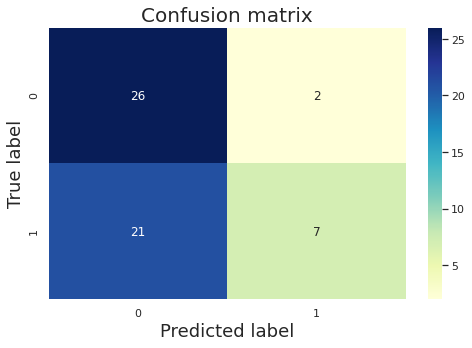

In [16]:
act_transformed = [1 if i == 'M' else 0 for i in act]
pred_transformed = [1 if i == 'M' else 0 for i in pred]

cm = confusion_matrix(act_transformed, pred_transformed)
#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [17]:
cm

array([[26,  2],
       [21,  7]])

In [18]:
tn, fp, fn, tp = confusion_matrix(act_transformed, pred_transformed).ravel()
print("True Negative:", tn)
print("False Positive:", fp)
print("False Negative:", fn)
print("True Positive:", tp)

True Negative: 26
False Positive: 2
False Negative: 21
True Positive: 7


### 📌 Sensitivity = True Positive / (True Positive + False Negative)

In [19]:
Sensitivity = tp / (tp + fn)
print(f"Sensitivity : {Sensitivity}")

Sensitivity : 0.25


### 📌Specificity = True Negative / (True Negative + False Positive)

In [20]:
Specificity = tn / (tn + fp)
print(f"Specificity : {Specificity}")

Specificity : 0.9285714285714286


# 🔷True Positive = BE

In [21]:
accuracy = accuracy_score(act, pred)
precision = precision_score(act, pred, average='binary', pos_label='E')
recall = recall_score(act, pred, average='binary', pos_label='E')
f1score = f1_score(act, pred, average='binary', pos_label='E')
#print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))
print(f"Accuracy = {accuracy}")
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Accuracy = 0.5892857142857143
Precision = 0.5531914893617021
Recall = 0.9285714285714286
F1 Score = 0.6933333333333335


## Confusion matrix

Text(0.5, 21.5, 'Predicted label')

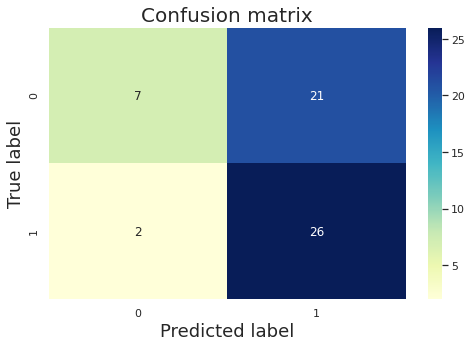

In [22]:
#create CF 
act_transformed = [1 if i == 'E' else 0 for i in act]
pred_transformed = [1 if i == 'E' else 0 for i in pred]

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#cmat = confusion_matrix(act, pred, labels=['M', 'E'])  #0, 1
cmat = confusion_matrix(act_transformed, pred_transformed) 

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

#ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax = sns.heatmap(cmat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [23]:
cmat

array([[ 7, 21],
       [ 2, 26]])

In [24]:
tn, fp, fn, tp = confusion_matrix(act_transformed, pred_transformed).ravel()
print("True Negative:", tn)
print("False Positive:", fp)
print("False Negative:", fn)
print("True Positive:", tp)

True Negative: 7
False Positive: 21
False Negative: 2
True Positive: 26


### 📌 Sensitivity = True Positive / (True Positive + False Negative)

In [25]:
Sensitivity = tp / (tp + fn)
print(f"Sensitivity : {Sensitivity}")

Sensitivity : 0.9285714285714286


### 📌Specificity = True Negative / (True Negative + False Positive)

In [26]:
Specificity = tn / (tn + fp)
print(f"Specificity : {Specificity}")

Specificity : 0.25


In [27]:
# #create CF 
# data = {'Actual': act,'Predicted' : pred,}
# df = pd.DataFrame(data, columns=['Actual','Predicted'])
# conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

# #Confusion matrix
# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# cm = confusion_matrix(act, pred)

# #plot Confusion matrix
# import seaborn as sns
# sns.set()
# fig, ax = plt.subplots(figsize=(8, 5))

# ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
# ax.set_title('Confusion matrix',fontsize=20)
# ax.set_ylabel('True label',fontsize=18)
# ax.set_xlabel('Predicted label',fontsize=18)